In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Min_Max y Standardscaler

In [2]:
data = pd.read_csv("./Datasets/Position_Salaries.csv")

In [3]:
data.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [4]:
np.shape(data)

(10, 3)

In [5]:
X=data.iloc[:,1:2].values # Obtenemos los valores de la columna 1 (nivel)

y=data.iloc[:,2:].values # Obtenemos los valores de la columna 3 (salario)

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Transformaciones

StandardScaler:

El StandardScaler, también conocido como z-score normalization, transforma los datos de manera que tengan una media de 0 y una desviación estándar de 1. Para lograr esto, resta la media de cada característica y luego divide por la desviación estándar.

Ventajas del StandardScaler:

- No se ve afectado por valores atípicos, ya que utiliza medidas de tendencia central y dispersión robustas.
- Útil cuando se asume que los datos se distribuyen normalmente.

Desventajas del StandardScaler:

- No garantiza que los datos queden dentro de un rango específico.
- Puede no ser adecuado para algoritmos que asumen que las características están en un rango específico, como las máquinas de soporte vectorial (SVM) con núcleo RBF.

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
from sklearn.preprocessing import StandardScaler # Importamos la libreria para escalar los datos
st_x=StandardScaler() # Creamos el objeto para escalar los datos 
st_y=StandardScaler() # Creamos el objeto para escalar los datos
X=st_x.fit_transform(X) # Escalamos los datos de la columna 1 (nivel)
y=st_y.fit_transform(y) # Escalamos los datos de la columna 3 (salario)

In [10]:
X 

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [31]:
y

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

In [11]:
#regresar a la forma original antes de la estandarización
X=st_x.inverse_transform(X) 
y=st_y.inverse_transform(y) 

In [12]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

MinMaxScaler:

Transforma los datos de manera que se ajusten a un rango específico, generalmente [0, 1]. Esto se logra restando el valor mínimo de cada característica y dividiendo por la diferencia entre el valor máximo y el valor mínimo de esa característica.
El resultado es que todos los valores se escalan dentro del rango deseado.

Ventajas del MinMaxScaler:

- Conserva la forma de la distribución original de los datos.
- Útil cuando se necesita que todas las características tengan un rango similar.
- Adecuado para algoritmos que asumen que las características están en una escala similar.

Desventajas del MinMaxScaler:

- Sensible a valores atípicos, ya que el rango se define por los valores mínimos y máximos.
- No es apropiado si la distribución de los datos no es uniforme o si hay muchos valores atípicos.

In [13]:
from sklearn.preprocessing import MinMaxScaler # Importamos la libreria para escalar los datos
st_x=MinMaxScaler(feature_range=(0, 1)) 
st_y=MinMaxScaler(feature_range=(0, 1))
X=st_x.fit_transform(X)
y=st_y.fit_transform(y)

In [14]:
X

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [15]:
y

array([[0.        ],
       [0.0052356 ],
       [0.01570681],
       [0.03664921],
       [0.06806283],
       [0.10994764],
       [0.16230366],
       [0.26701571],
       [0.47643979],
       [1.        ]])

In [16]:
#regresar a la forma original antes de MinMaxScaler

X=st_x.inverse_transform(X)
y=st_y.inverse_transform(y)

In [17]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

RobustScaler

Es similar al MinMaxScaler en que se escala los datos a un rango específico, generalmente [-1, 1] o [0, 1]. Sin embargo, el RobustScaler utiliza medidas robustas de tendencia central y dispersión, por lo que es adecuado para datos con valores atípicos.

Ventajas y desventajas de RobustScaler: 

- Las ventajas y desventajas del RobustScaler son las mismas que las del MinMaxScaler, con la ventaja adicional de que es robusto a los valores atípicos.


In [18]:
#importar robust scaler
from sklearn.preprocessing import RobustScaler # Importamos la libreria para escalar los datos
st_x=RobustScaler() # Creamos el objeto para escalar los datos
st_y=RobustScaler() # Creamos el objeto para escalar los datos
X=st_x.fit_transform(X) # Escalamos los datos de la columna 1 (nivel)
y=st_y.fit_transform(y) # Escalamos los datos de la columna 3 (salario)

In [19]:
X

array([[-1.        ],
       [-0.77777778],
       [-0.55555556],
       [-0.33333333],
       [-0.11111111],
       [ 0.11111111],
       [ 0.33333333],
       [ 0.55555556],
       [ 0.77777778],
       [ 1.        ]])

In [20]:
y

array([[-0.4047619 ],
       [-0.38095238],
       [-0.33333333],
       [-0.23809524],
       [-0.0952381 ],
       [ 0.0952381 ],
       [ 0.33333333],
       [ 0.80952381],
       [ 1.76190476],
       [ 4.14285714]])

In [21]:
# regresar a la forma original antes de RobustScaler
X=st_x.inverse_transform(X)
y=st_y.inverse_transform(y)


In [22]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [23]:
y

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

# Tratamiento de variables categóricas

In [24]:
data # Datos originales sin escalar

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Obtener variables dummies

In [25]:
X=data['Position']
#one hot encoding
X=pd.get_dummies(X,dtype=int) # Convertimos los datos de la columna 1 (nivel) en variables dummy (one hot encoding)
X

,Business Analyst,C-level,CEO,Country Manager,Junior Consultant,Manager,Partner,Region Manager,Senior Consultant,Senior Partner
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [26]:
X=np.array(data['Position'])

# one hot encoding con one hot encoder

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X.reshape(-1,1)).toarray()

In [27]:
X

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

# Observemos los datos

In [28]:
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(X,y,color='b')

# Correlación

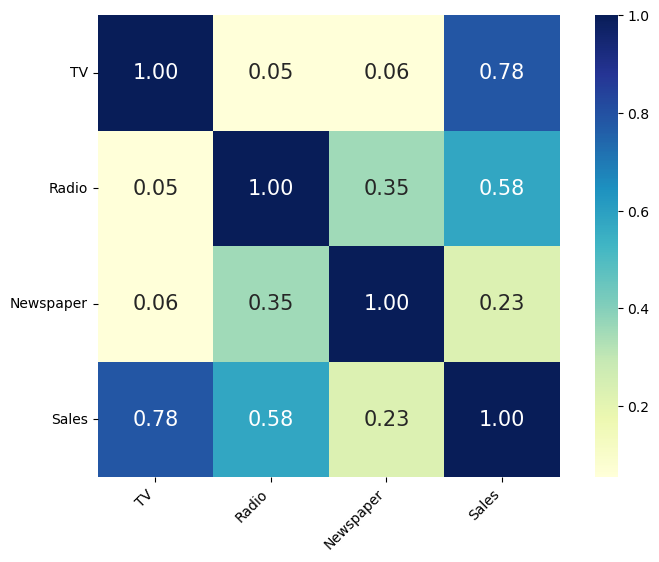

In [29]:
data_ads = pd.read_csv("./Datasets/Advertising.csv")
#data_ads=data_ads[['TV','Radio','Newspaper']]
fig = plt.figure(figsize= (9,6))
sns.heatmap(data_ads.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

# Correlación de Pearson calculada manualmente

In [33]:
data_ads = pd.read_csv("./Datasets/Advertising.csv")

In [34]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


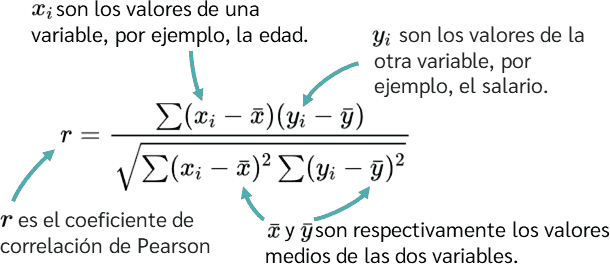

In [35]:
# (x - x_m) * (y - y_m)

data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"])) # Numerador de la correlación de Pearson (TV) y (Sales) 

#(x - x_m) * (y - y_m) donde x_m es la media de x y y_m es la media de y 

In [36]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [37]:
# (x - x_m)**2 donde x_m es la media de x 
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2 

In [38]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [39]:
# (y - y_media)**2 
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2 

In [40]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


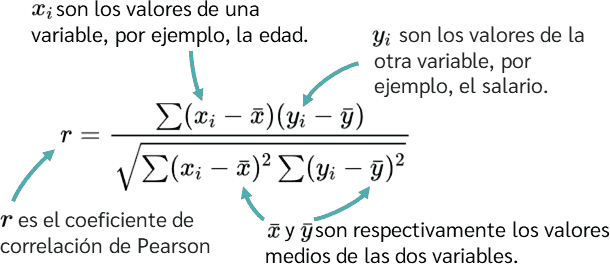

In [41]:
# Correlación de Pearson (r) entre las dos variables (corrn) / (raiz cuadrada de la correlación de la variable 1 (corr1) por la correlación de la variable 2 (corr2)) 
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"])) 

In [42]:
corrn

0.782224424861606

In [43]:
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [44]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [ ]:
cols = data_ads.columns.values

In [ ]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583006
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
TV, corrn : -0.0011216033233262038
TV, corr1 : -0.07879735036509561
TV, corr2 : -0.044356832710774986
Radio, TV : 0.05480866446583006
Radio, Radio : 1.0
Radio, Newspaper : 0.35410375076117545
Radio, Sales : 0.576222574571055
Radio, corrn : 0.003367194224496711
Radio, corr1 : 0.1085768694522229
Radio, corr2 : 0.2893339127009435
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.35410375076117545
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616534
Newspaper, corrn : 0.004654495262249762
Newspaper, corr1 : 0.5503385875778577
Newspaper, corr2 : 0.4510003408188791
Sales, TV : 0.782224424861606
Sales, Radio : 0.576222574571055
Sales, Newspaper : 0.22829902637616534
Sales, Sales : 1.0
Sales, corrn : 0.03435823617756822
Sales, corr1 : 0.32268575794328536
Sales, corr2 : 0.33911088549652796
corrn, TV : 0.0022516606160889827
corrn, Radio : 0.013091062391317207
corrn

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

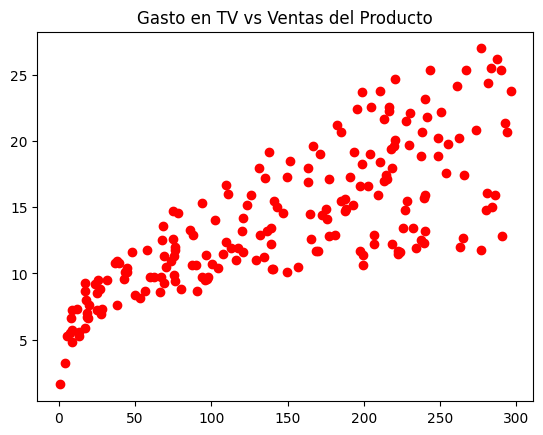

In [ ]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

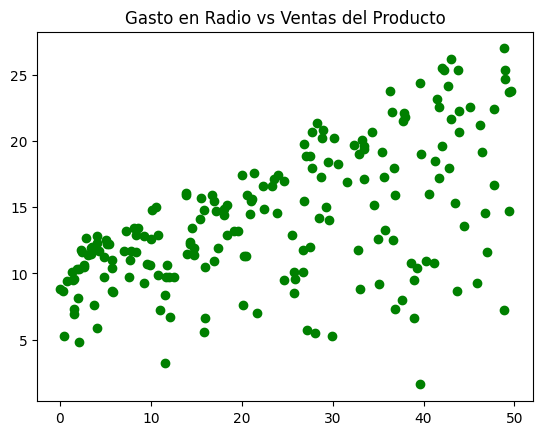

In [ ]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Periódico vs Ventas del Producto')

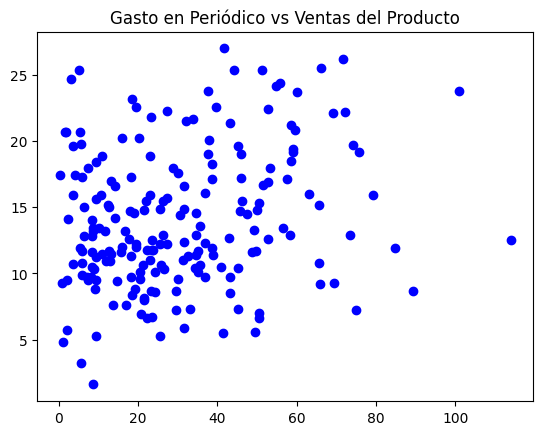

In [ ]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs Ventas del Producto")